In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


 Loading the Data:

In [4]:
# Load the data into a DataFrame
hourlywage_df = pd.read_csv('hourlywagedata.csv')

# Display the first 5 rows of the dataset
print(hourlywage_df.head())


   position  agerange  yrsscale          hourwage
0         1         1         2   13.736234054538
1         0         1         2  16.4407309689108
2         0         1         3  21.3891077239505
3         1         1         1   11.377187468408
4         0         1         3  21.5607775454338


In [5]:
# Convert 'hourwage' to numeric, coerce errors to NaN
hourlywage_df['hourwage'] = pd.to_numeric(hourlywage_df['hourwage'], errors='coerce')

# Re-run describe() on the entire DataFrame
hourlywage_df.describe()


,position,agerange,yrsscale,hourwage
count,3000.000000,3000.000000,3000.000000,2911.000000
mean,0.333333,2.136000,3.527333,20.015860
std,0.471483,0.661551,1.349022,4.003089
min,0.000000,1.000000,1.000000,4.215732
25%,0.000000,2.000000,3.000000,17.415044
50%,0.000000,2.000000,4.000000,20.180008
75%,1.000000,3.000000,5.000000,22.784393
max,1.000000,3.000000,6.000000,32.803854


Handling Missing Data:

The average hourly wage of all employees is around 20.0

The average number of employess in postion is around 0.33 years.

The average number of years spent in employment/experience is around 3.52 years.

Changing Data Types:

In [6]:


# Convert 'hourwage' to numeric, coerce errors to NaN
hourlywage_df['hourwage'] = pd.to_numeric(hourlywage_df['hourwage'], errors='coerce')

# Re-run describe() on the entire DataFrame
hourlywage_df.describe()

# Round the 'hourwage' column to 2 decimal places
hourlywage_df['hourwage'] = pd.to_numeric(hourlywage_df['hourwage'], errors='coerce')
hourlywage_df['hourwage'] = hourlywage_df['hourwage'].round(2)

# Reset the index after removing rows with empty wages
dfclean = hourlywage_df.reset_index(drop=True)

# Display the cleaned DataFrame
print(dfclean)



      position  agerange  yrsscale  hourwage
0            1         1         2     13.74
1            0         1         2     16.44
2            0         1         3     21.39
3            1         1         1     11.38
4            0         1         3     21.56
...        ...       ...       ...       ...
2995         0         3         4     20.42
2996         0         3         4     20.44
2997         1         3         4     18.45
2998         0         3         4     19.14
2999         0         3         3     13.64

[3000 rows x 4 columns]


Removing Duplicates:

In [7]:
# Remove duplicate entries
hourlywage_df = hourlywage_df.drop_duplicates()


# Optionally, reset the index after removing duplicates
hourlywage_df = hourlywage_df.reset_index(drop=True)

# Display a sample of the DataFrame after removing duplicates
print(hourlywage_df.sample(1))

      position  agerange  yrsscale  hourwage
2444         0         3         6     22.44


In [8]:
hourlywage_df.dropna(inplace=True,axis="rows") #drop all missing values

In [9]:
hourlywage_df .isnull().sum().sum() #Check if there are any missing values in the dataset.
print(hourlywage_df.sample(1)) 

     position  agerange  yrsscale  hourwage
777         1         2         4     18.67


In [18]:
oldest_employee = hourlywage_df['agerange'].max()

"refers to age ranges of the nurses; 1 = 18-30, 2 = 31-45 and 3 = 46-65."

print("The oldest employee is in factor ", oldest_employee)

The oldest employee is in factor  3


Visualizations

In [11]:

position_counts = hourlywage_df['position'].value_counts()

# Display the counts
print(position_counts)


position
0    1783
1     928
Name: count, dtype: int64



sns.lineplot(x='yrsscale', y='hourwage', data=hourlywage_df, marker='o', linestyle='-', color='green')
plt.xlabel('yrsscale')
plt.ylabel('Hourly Wage')
plt.title('Hourly Wage Over Time')
plt.grid(True)
plt.show()






/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


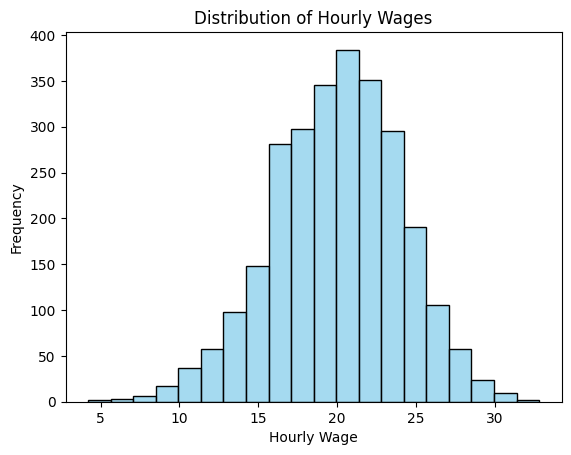

In [12]:

sns.histplot(hourlywage_df['hourwage'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hourly Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Hourly Wages')
plt.show()



/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

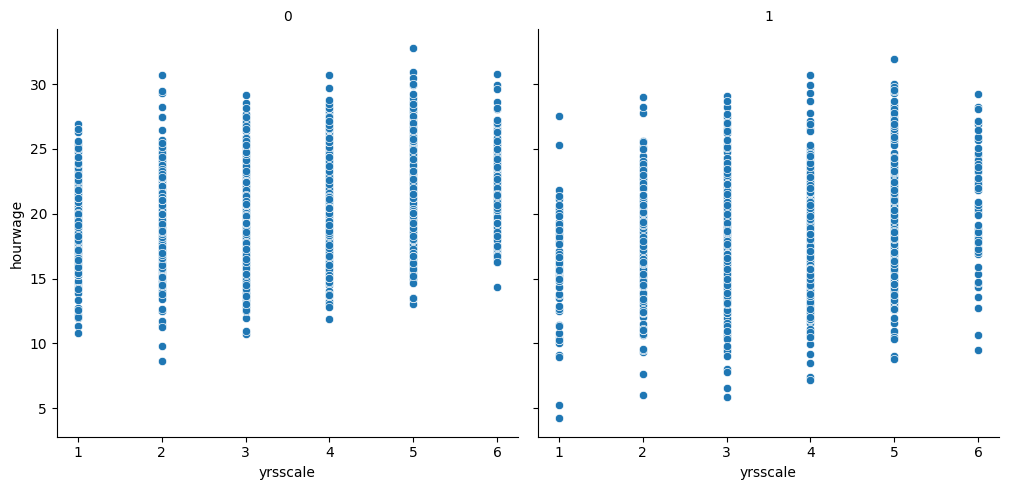

In [14]:

g = sns.FacetGrid(hourlywage_df, col='position', height=5, col_wrap=3)
g.map(sns.scatterplot, 'yrsscale', 'hourwage')
g.set_axis_labels('yrsscale', 'hourwage')
g.set_titles(col_template="{col_name}")
plt.show()


For visualization, I used a scatter plot with a FacetGrid, categorizing by 'position.' The plot revealed a clear trend, suggesting a potential correlation between 'yrsscale' and 'hourwage.' The data points form a straight-line distribution, and there is increased density at the lower end of the scatter plot, indicating a cluster of data points with lower yearly salary and hourly wage.

This visualization provides valuable insights into the relationship between years of experience, position, and hourly wage.

/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='agerange', ylabel='Count'>

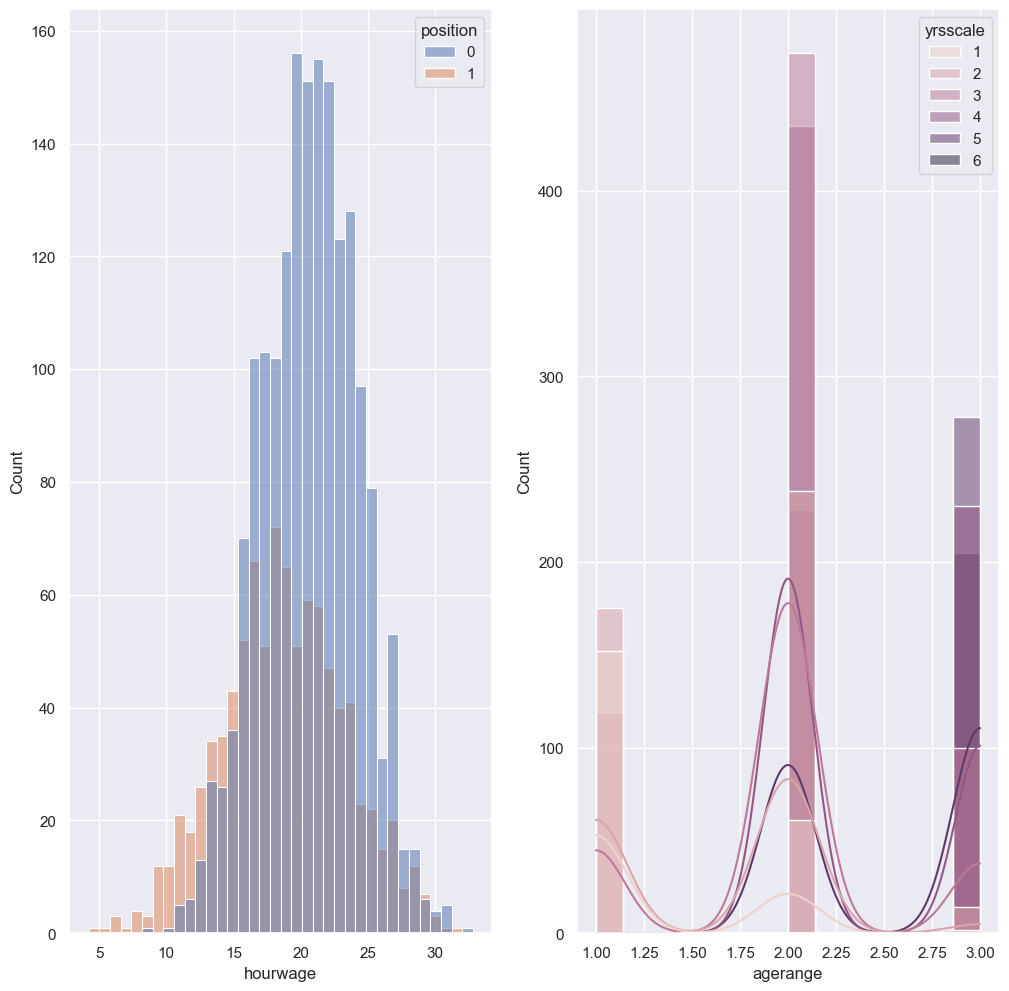

In [15]:
sns.set(style='darkgrid')  
fig,axs = plt.subplots(1,2, figsize=(12,12)) 
sns.histplot(data=hourlywage_df, x='hourwage',color ='skyblue',hue = "position",ax =axs[0]) 
sns.histplot(data=hourlywage_df, x='agerange',kde=True,color ='olive',hue ="yrsscale",ax =axs[1])